In [1]:
# import libraries Needed for analysis
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify as sq
from functools import reduce

In [19]:
#Plot football pitch using matplotlib
def draw_pitch(ax):
    

    #Draw football pitch and halfway line
    plt.plot([0,0],[0,80], color="green")
    plt.plot([0,120],[80,80], color="green")
    plt.plot([120,120],[80,0], color="green")
    plt.plot([120,0],[0,0], color="green")
    plt.plot([60,60],[0,80], color="green")

    #Draw left side penalty area
    plt.plot([14.6,14.6],[57.8,22.2],color="green")
    plt.plot([0,14.6],[57.8,57.8],color="green")
    plt.plot([0,14.6],[22.2,22.2],color="green")

    #Draw right side penalty area
    plt.plot([120,105.4],[57.8,57.8],color="green")
    plt.plot([105.4,105.4],[57.8,22.5],color="green")
    plt.plot([120, 105.4],[22.5,22.5],color="green")

    #Draw left side 6 yard box
    plt.plot([0,4.9],[48,48],color="green")
    plt.plot([4.9,4.9],[48,32],color="green")
    plt.plot([0,4.9],[32,32],color="green")

    #Draw right side 6 yard box
    plt.plot([120,115.1],[48,48],color="green")
    plt.plot([115.1,115.1],[48,32],color="green")
    plt.plot([120,115.1],[32,32],color="green")

    #Create centre circle and spot
    centreCircle = plt.Circle((60,40),8.1,color="green",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="green")
    #Create left and right side penalty spot
    leftPenSpot = plt.Circle((9.7,40),0.71,color="green")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="green")

    #Draw circles created above
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

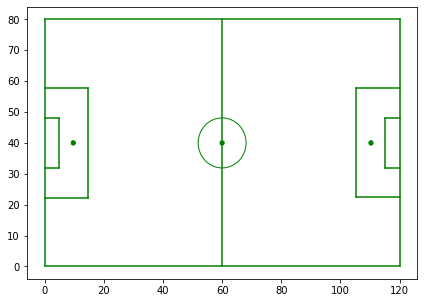

In [20]:
    #Plot football pitch
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.show()

In [21]:
# loading the json file (downloaded from https://github.com/statsbomb/open-data/blob/master/data/events/7550.json)
with open('england.json') as data_file:    
    data = json.load(data_file)

In [27]:
#normalise json data 
df = json_normalize(data, sep = "_")
# get passing information of Sterling
sterling_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Raheem Shaquille Sterling')] 
#Create pass column 
pass_column = [i for i in df.columns if i.startswith("pass")]
sterling_pass = sterling_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
sterling_pass.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
21,5f454cb2-0a8d-46f9-b318-6f3732038776,1,00:00:14.203,"[69.0, 64.0]","[60.0, 63.0]",Kyle Walker
28,72040bcb-d9a1-4f55-bf4b-e84d487cca58,1,00:00:17.603,"[66.0, 66.0]","[75.0, 70.0]",Ruben Loftus-Cheek
35,a76f01ad-803f-4d7b-a97d-b5490dec70df,1,00:00:21.243,"[69.0, 65.0]","[64.0, 66.0]",Kyle Walker
61,34725ad1-a210-4329-a3ac-4e85c972bb60,1,00:00:38.683,"[76.0, 21.0]","[75.0, 10.0]",Harry Maguire
189,88515a6a-883e-4a48-b2ad-d79cc220d9a3,1,00:06:15.763,"[87.0, 25.0]","[79.0, 12.0]",Harry Maguire


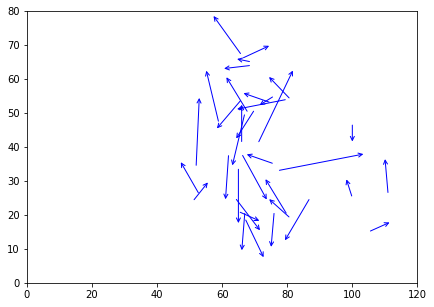

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
for i in range(len(sterling_pass)):
    # can also differentiate by color
    color = "blue" if sterling_pass.iloc[i]['period'] == 1 else "red"
    ax.annotate("", xy = (sterling_pass.iloc[i]['pass_end_location'][0], sterling_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (sterling_pass.iloc[i]['location'][0], sterling_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

In [29]:
# extract Sterlings involvement throuhout the entire match
sterling_action = df[(df['player_name']=='Raheem Shaquille Sterling')][["id", "type_name","period", "timestamp", "location"]]
sterling_action.head()

,id,type_name,period,timestamp,location
19,2f7e0e17-c1ce-41d1-be61-a6c7f997a7aa,Ball Receipt*,1,00:00:14.122,"[68.0, 62.0]"
20,7261950f-dd8b-45c4-b26d-f59c6afcc226,Carry,1,00:00:14.122,"[68.0, 62.0]"
21,5f454cb2-0a8d-46f9-b318-6f3732038776,Pass,1,00:00:14.203,"[69.0, 64.0]"
25,d7acf11e-222a-4d0c-9ab8-b1bacbbe4dc3,Ball Receipt*,1,00:00:16.722,"[66.0, 66.0]"
26,f90736d0-7102-4095-875e-ddb572b8ab95,Carry,1,00:00:16.722,"[66.0, 66.0]"


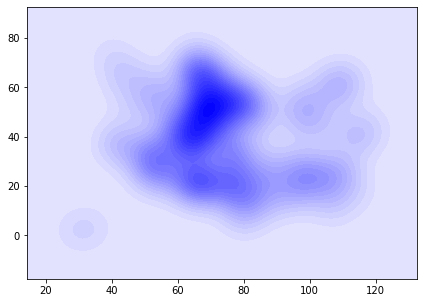

In [25]:
#Create heat map of Sterlings involvment throughout the match using seaborn
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#Iterate through location co-ordinates
x_coord = [i[0] for i in sterling_action["location"]]
y_coord = [i[1] for i in sterling_action["location"]]

sns.kdeplot(x_coord, y_coord, shade = "True", color = "blue", n_levels = 30)
plt.show()

In [31]:
#Create function to merge 
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "white" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "blue", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

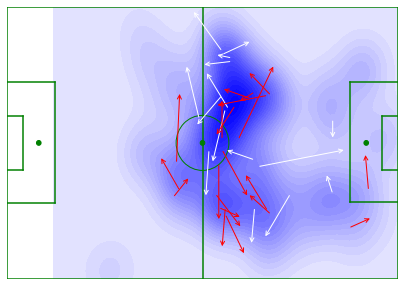

In [34]:
heat_pass_map(df, 'Raheem Shaquille Sterling')

In [35]:
#Create function to merge 
def heat_shop_map(data, player_name):
    shot_data = data[(data['type_name'] == "Shot") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(shot_data)):
        # we also differentiate different half by different color
        color = "white" if shot_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
               xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "blue", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

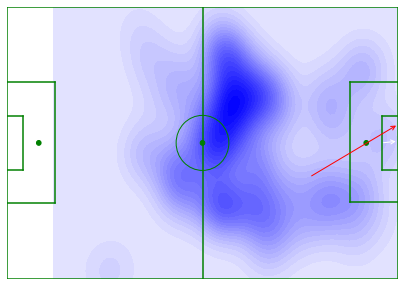

In [44]:
heat_shop_map(df, 'Ruben Loftus-Cheek')